Попробуйте улучшить работу нейронной сети(берем простую линейную сеть, которую разбиращли на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) обучавшейся на датасет Fashion-MNIST. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np

2.3.0


In [2]:
print("GPU: ", end=''),
print(tf.config.experimental.list_physical_devices("GPU"))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [6]:
#train_images = train_images.reshape((-1, train_images.shape[1] * train_images.shape[2]))
#test_images = test_images.reshape((-1, test_images.shape[1] * test_images.shape[2]))

#train_images = train_images.reshape(60000,28,28,1)
#test_images = test_images.reshape(10000,28,28,1)

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
def conversion_in_one_class(data, class_variable):
    result = data.copy()
    if class_variable in result:
        for i in range(len(result)):
            if result[i] == class_variable:
                result[i] = 1
            else:
                result[i] = 0
    else:
        raise Exception('лень')
    
    return result

In [9]:
print(train_labels)

class_0 = conversion_in_one_class(train_labels, 0)
class_1 = conversion_in_one_class(train_labels, 1)
class_2 = conversion_in_one_class(train_labels, 2)
class_3 = conversion_in_one_class(train_labels, 3)
class_4 = conversion_in_one_class(train_labels, 4)
class_5 = conversion_in_one_class(train_labels, 5)
class_6 = conversion_in_one_class(train_labels, 6)
class_7 = conversion_in_one_class(train_labels, 7)
class_8 = conversion_in_one_class(train_labels, 8)
class_9 = conversion_in_one_class(train_labels, 9)

print(class_0)
print(class_1)
print(class_2)
print(class_3)
print(class_4)
print(class_5)
print(class_6)
print(class_7)
print(class_8)
print(class_9)

[9 0 0 ... 3 0 5]
[0 1 1 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [10]:
import tensorflow.keras.layers as layer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20, 7]

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8960000276565552, val_accuracy: 0.8815000057220459
accuracy: 0.9223958253860474, val_accuracy: 0.8890833258628845
accuracy: 0.9439583420753479, val_accuracy: 0.890500009059906
accuracy: 0.9584791660308838, val_accuracy: 0.895166695117

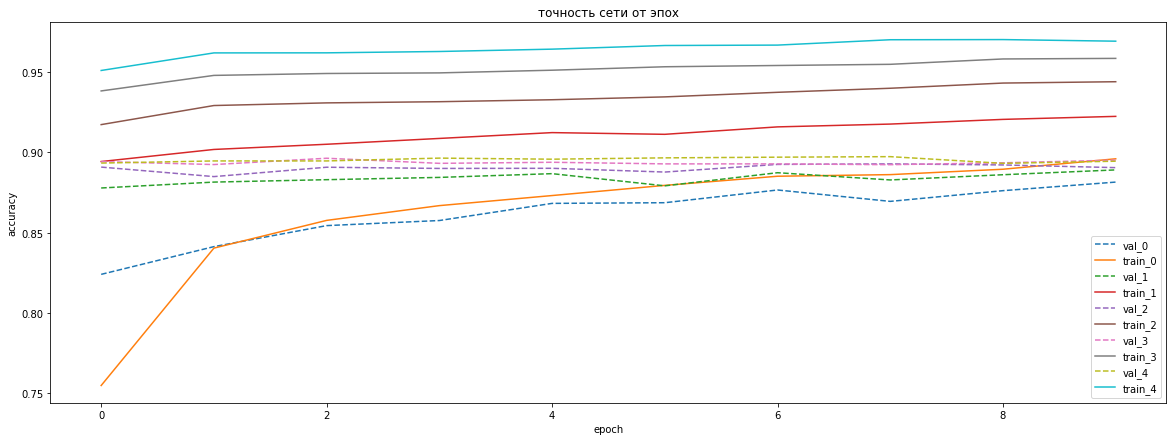

Wall time: 16.3 s


In [11]:
%%time
#Запустим сеть как на уроке раз 5
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

#x = layer.Conv2D(64, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(512, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=1000,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [12]:
#0.89 на валидационной выборке

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8882291913032532, val_accuracy: 0.8759166598320007
accuracy: 0.9123333096504211, val_accuracy: 0.8877500295639038
accuracy: 0.9314583539962769, val_accuracy: 0.8924999833106995
accuracy: 0.9439166784286499, val_accuracy: 0.8931666612

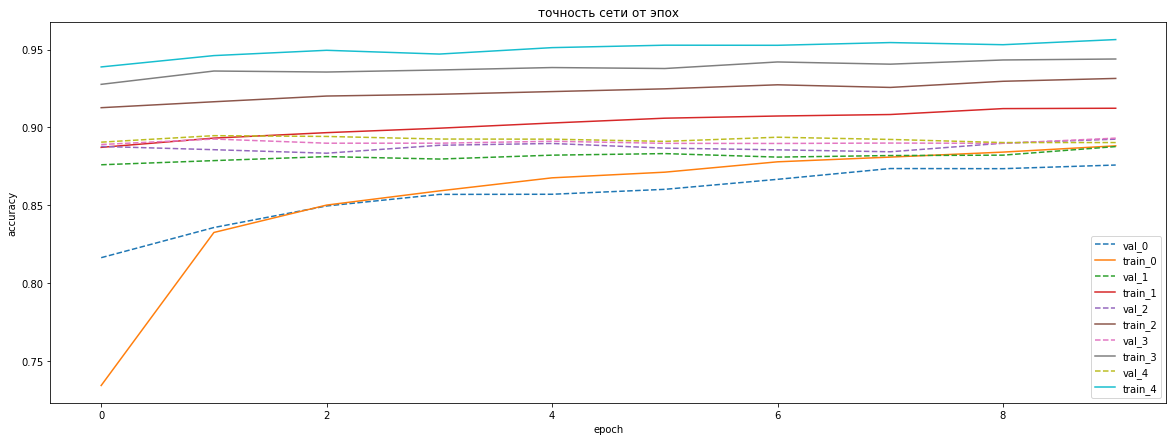

Wall time: 13.3 s


In [13]:
%%time
#Уменьшим кол-во нейронов
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

#x = layer.Conv2D(64, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(256, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=1000,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [14]:
#Точность упала, но не так чтобы сильно

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9115208387374878, val_accuracy: 0.8834166526794434
accuracy: 0.9375208616256714, val_accuracy: 0.890749990940094
accuracy: 0.9621250033378601, val_accuracy: 0.8988333344459534
accuracy: 0.9780208468437195, val_accuracy: 0.8930000

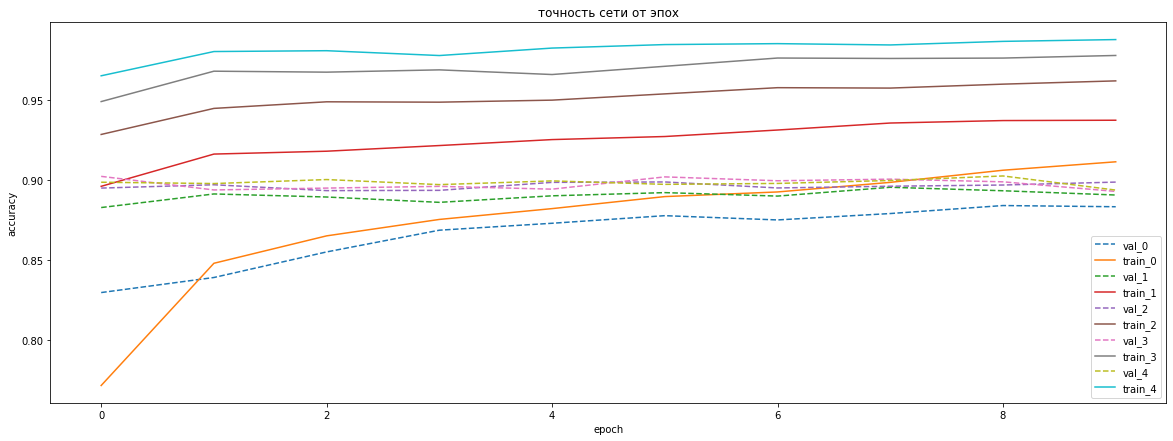

Wall time: 25.9 s


In [15]:
%%time
#величим кол-во нейронов
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

#x = layer.Conv2D(64, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(2048, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=1000,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [16]:
#Точность на тестовой конечно выросла, но на  валидационной все также плохо

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
___________________________________________

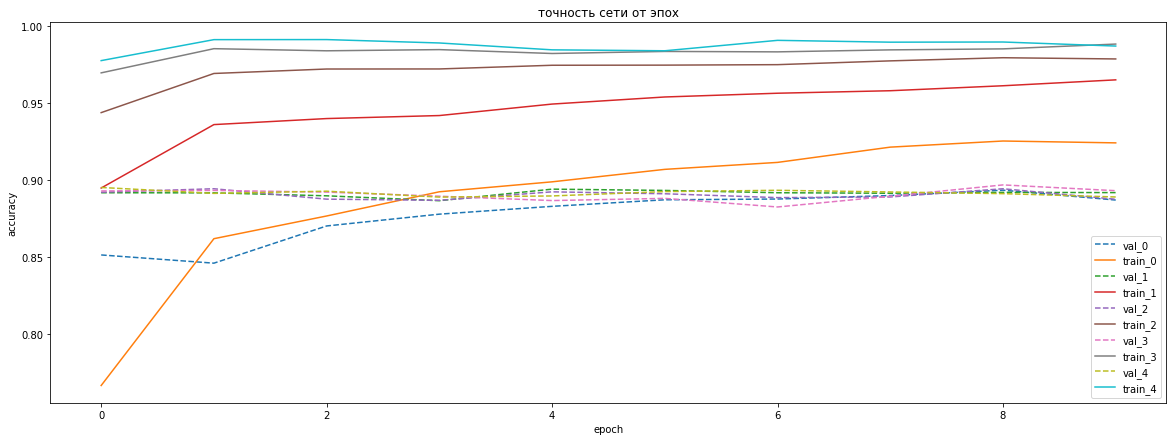

Wall time: 41.1 s


In [17]:
%%time
#Добавим парочку слоёв
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

#x = layer.Conv2D(64, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=1000,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [18]:
#Опять же на валидационной ничего не меняется, а на тренеровочной результат вырос

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
___________________________________________

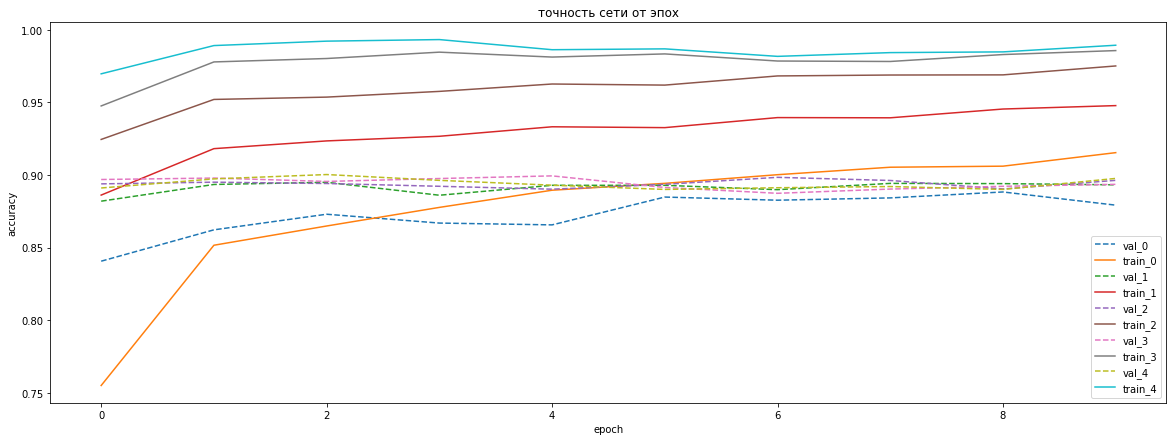

Wall time: 42.9 s


In [19]:
%%time
#поперебираемфункции распределения
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

#x = layer.Conv2D(64, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(1024, activation='linear')(x)
x = layer.Dense(1024, activation='tanh')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=1000,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [20]:
#Функции распределения практически не повлияли

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9191250205039978, val_accuracy: 0.887333333492279
accuracy: 0.9506250023841858, val_accuracy: 0.8911666870117188
accuracy: 0.9677500128746033, val_accuracy: 0.8943333625793457
accuracy: 0.9818333387374878, val_accuracy: 0.89541667699

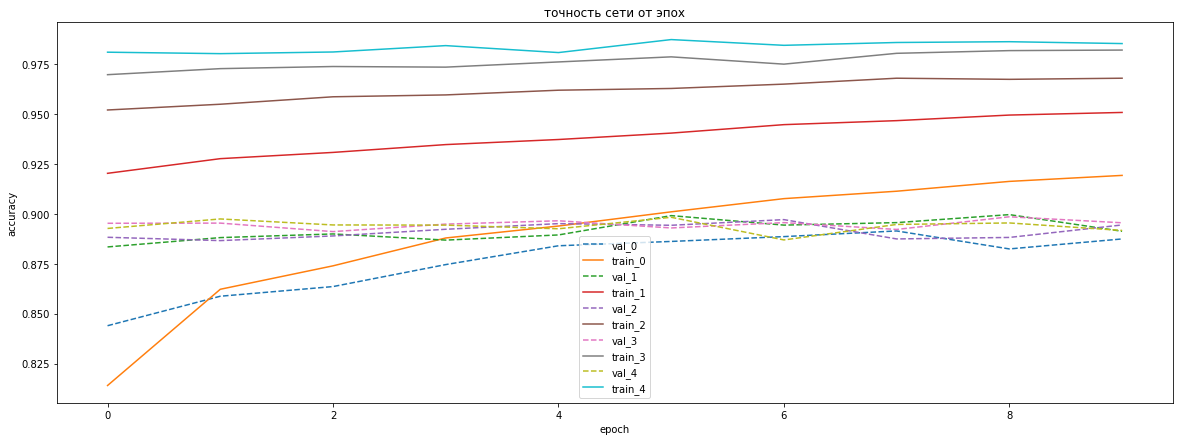

Wall time: 34.3 s


In [21]:
%%time
#Добавим сверточный слой, но уберем два полносвязных слоя, ато долго
#batch_size пришлось уменьшить, ругалось, что GPU такое переварить не в состоянии
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=200,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [22]:
#На тренеровочной выборке всё отлично, но на валидационной все также плохо

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9206874966621399, val_accuracy: 0.887666642665863
accuracy: 0.953083336353302, val_accuracy: 0.8887500166893005
accuracy: 0.9686458110809326, val_accuracy: 0.8987500071525574
accuracy: 0.9828333258628845, val_accuracy: 0.89766669

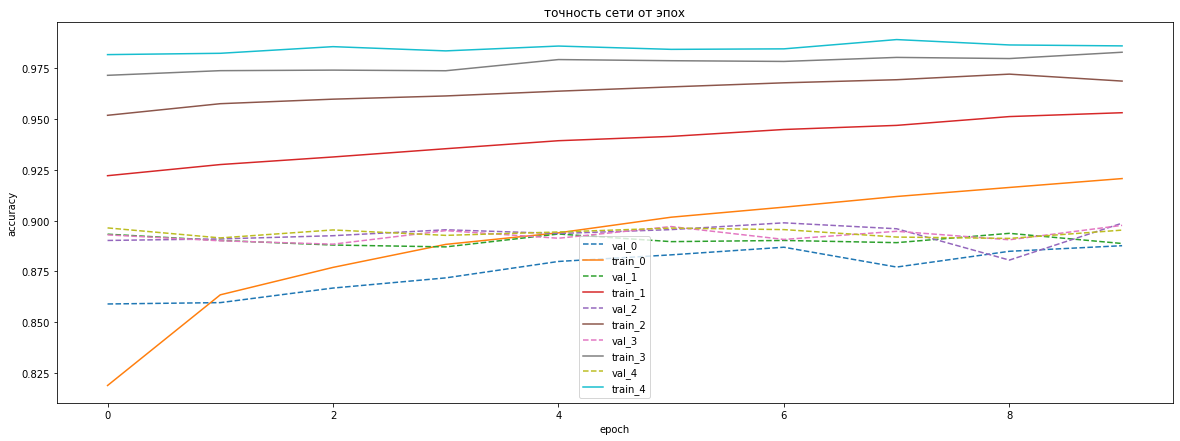

Wall time: 44.2 s


In [23]:
%%time
#Посмотрим на макспулинг
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

x = layer.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input1)
#x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layer.Flatten()(input1)
x = layer.Dense(2048, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=200,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [24]:
#Макспулинг не поменял ничего

In [25]:
#Перепробовал несколько вариантов. Такое чувство, что уперся в потолок. Меняю параметры, а глобально ничего не меняется.
#оптимальным получается 1 слой с 1024 нейронами, замена функции активации практически дело не меняет. 
#Добавление сверточных слоев погоды не делает.


Model: "functional_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 224)               175840    
_________________________________________________________________
dense_19 (Dense)             (None, 200)               45000     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2010      
Total params: 222,850
Trainable params: 222,850
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9104583263397217, val_accuracy: 0.8844166398048401
accuracy: 0.9442708492279053, val_accuracy: 0.8932

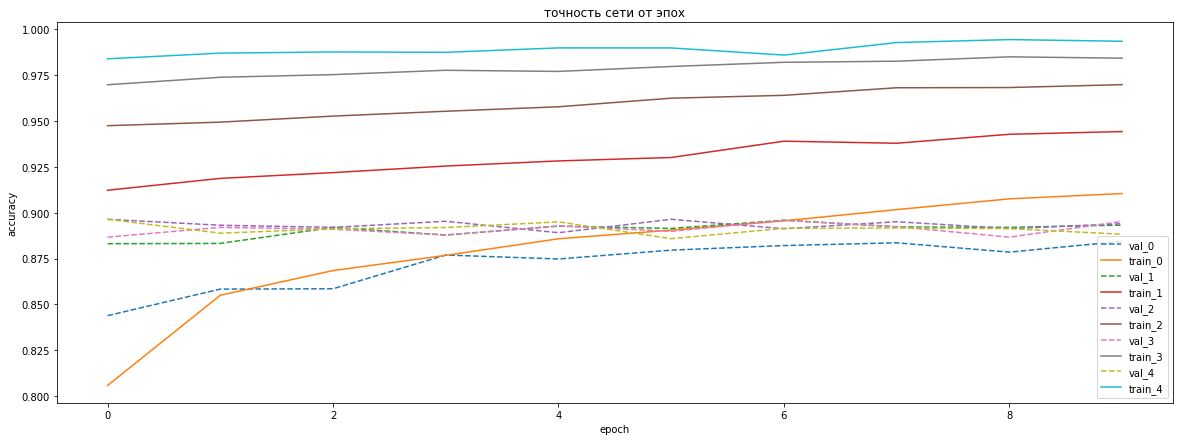

Wall time: 28.4 s


In [26]:
%%time
#Ну и на последок... 
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input1)
x = layer.Dense(224, activation='tanh')(x)
x = layer.Dense(200, activation='tanh')(x)
x = layer.Dense(10, activation='softmax')(x)

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=200,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [27]:
#Случайно запустил такой конфиг, а он лучше и быстрее предидущих, хотя под конец она уже переобучается.

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        728       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 56)        39256     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 224)             

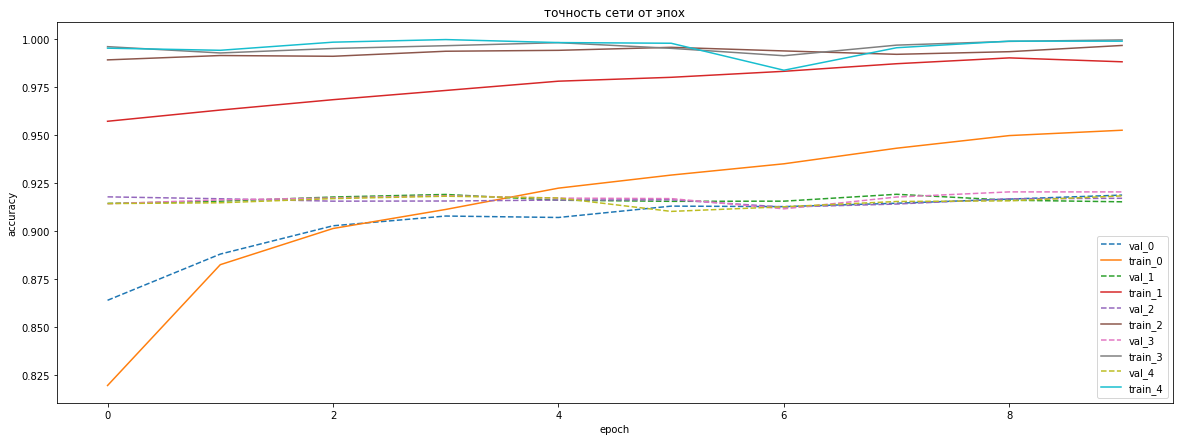

Wall time: 1min 58s


In [28]:
%%time
#...на последок... 
repeat = 5
history_list = dict()

input1 = layer.Input(shape=(28, 28, 1))

x = layer.Conv2D(28, (5, 5), strides=(1, 1), padding='same')(input1)
x = layer.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same')(x)
x = layer.Conv2D(56, (5, 5), strides=(1, 1), padding='same')(x)
x = layer.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = layer.Flatten()(x)
x = layer.Dense(224, activation='tanh')(x)
x = layer.Dense(200, activation='tanh')(x)
x = layer.Dense(10, activation='softmax')(x)

#Надеюсь правильно срисовал, да для другого набора эта сеть

for i in range(repeat):
    model = Model(inputs=input1,outputs=x)
    
    if i == 0:
        model.summary()

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history = model.fit(
        train_images, 
        to_categorical(train_labels,10),
        epochs=10,
        batch_size=200,
        validation_split = 0.2, 
        verbose=0
    )
    
    history_list[i] = history.history
    
    print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

for i in range(len(history_list)):
    plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
    plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [29]:
#Срисовал сеть я похоже несовсем правильно, но... точность то подросла.

Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

Честно говоря ничего не придумал кроме как применить MaxPooling2D и Conv2D